# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: OGUNSEYE DEBORAH ADEDOYIN

<br>

## Please show and display ALL your calculations and results.


In [62]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

In [63]:
# Lets define a function that loads our data

In [64]:
def load_data(*, filename: str, sep: str =',') -> pd.DataFrame:
    data = pd.read_csv(filename, sep=sep)
    print(f"shape of data: {data.shape}\n")
    return data 

In [65]:
data = load_data(filename='Ulta Skincare Reviews.csv')
data.head(3)

shape of data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


Data Pre-Processing

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [67]:
data.describe()

,Review_Upvotes,Review_Downvotes
count,4150.000000,4150.000000
mean,0.591325,0.161205
std,2.210041,0.912561
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


In [68]:
data = data.dropna() #Let's drop the nans since they are insignificant number of 4 items

In [69]:
data.isnull().sum() #To confirm that the nulls are off

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [70]:
import nltk
from nltk.corpus import stopwords

Text Pre-Processing

In [71]:
data['Review_Text'] = data['Review_Text'].str.lower() #to lower case wording
data['Review_Text'] = data['Review_Text'].str.replace('[^\w\s]', '') #to remove punctuations 
data['Review_Text'] = data['Review_Text'].str.replace('\d',' ') #to replace numbers in the reviews columns with nothing

In [72]:
#Let's split our data for words not in stop_words
stop_words = stopwords.words('english') 
data['Review_Text'] = data['Review_Text'].apply(
    lambda x: " ".join(x for x in str(x).split() if x not in stop_words))

In [73]:
from textblob import TextBlob #To process our textual data

In [74]:
#Let's perform tokenization with TextBlob
data['Review_Text'].apply(lambda x: TextBlob(x).words).head()

0                                                                                                                  [love, using, face, shower, heats, gives, light, scrub, nicely]
1                                                                                                       [even, better, daily, microfoliant, i, 'm, obsessed, skin, much, smoother]
2                                                                                                               [enjoy, product, much, look, forward, using, really, feels, great]
3    [i, 've, never, tried, anything, like, love, it, apply, face, get, little, shot, warm, feels, good, scrub, seems, gritty, side, effects, i, 've, encountered, positive, ones]
4                                                                       [exfoliates, nicely, gives, smooth, skin, irritation, reaction, skin, highly, recommended, it, buy, again]
Name: Review_Text, dtype: object

In [75]:
#dependencies to use lemmatizer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
# create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Let's define a function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text) # tokenize the text into words
    lemmatized_text = ' '.join([lemmatizer.lemmatize(w) for w in tokens]) # lemmatize each word and join them back into a string
    return lemmatized_text

# apply the lemmatize_text function to the 'text' column of the DataFrame
data['Review_Text'] = data['Review_Text'].apply(lemmatize_text)

In [77]:
#Now let's count the most occuring word in the lemmzatized column
counts = data['Review_Text'].apply(lambda x: pd.value_counts(
    x.split(" "))).sum(axis=0).reset_index()

counts.columns = ["words", "counts"] #to rename the columns
counts.head()

,words,counts
0,love,1319.0
1,using,1261.0
2,face,1347.0
3,shower,106.0
4,.,11135.0


In [78]:
import re
from collections import Counter

In [79]:
patterns = {"face": r"face[\w\s]+use",
            "difficulty": r"use[\w\s]+face",
            "body": r"shower[\w\s]+(heat|damange|help|use|breakout)",
            "skin": r"exfoliate[\w\s]+(heat|damage|help|rashes|issue|acne|skin|breakout)"
           }
#Lets define a function that takes a string as an input and counts all in the patterns variable
def count_issues(text):
    Issue_Counts = Counter()
    for issue, pattern in patterns.items():
        if re.search(pattern, text, re.IGNORECASE):
            Issue_Counts[issue] += 1
    return Issue_Counts

In [80]:
data['Issue_Counts'] = data['Review_Text'].apply(count_issues)

Issue_Counts = pd.DataFrame(data['Issue_Counts'].tolist())
Total_Counts = Issue_Counts.sum()

# print the results
print("Common issues faced by customers:")
for issue, count in Total_Counts.items():
    print(f"{issue}: {count} occurrences")

Common issues faced by customers:
skin: 114.0 occurrences
difficulty: 134.0 occurrences
face: 55.0 occurrences
body: 5.0 occurrences


###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [81]:
from wordcloud import WordCloud, STOPWORDS

In [82]:
text = " ".join(cat for cat in data.Product) #Lets create a text variable that joins all column as a string

In [83]:
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

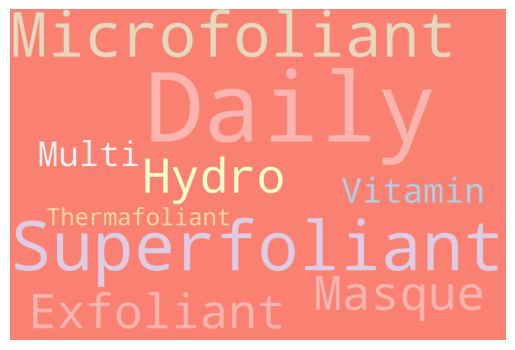

In [85]:
 # Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [86]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [87]:
# import relevant sentiment analysis package
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [88]:
#To create an object with the Sentiment class
SIA = SentimentIntensityAnalyzer()

In [90]:
#Let's apply polarity scores to the values in Review_Text column
data['Sentiments'] = data['Review_Text'].apply(lambda x: SIA.polarity_scores(x))

#
reviews_df = pd.concat([data.drop(['Sentiments'], axis=1), data['Sentiments'].apply(pd.Series)], axis=1)

In [92]:
data.head(1) #to confirm our Sentiments column has been created with series

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Issue_Counts,Sentiments
0,Perfect,love using face shower . heat give light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,{},"{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7964}"


In [94]:
#compound score is a score between -1 and 1 and we will be making compound score a column here
data["compound_score"] = data["Review_Text"].apply(lambda x: SIA.polarity_scores(x)["compound"])
data.head(1)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Issue_Counts,Sentiments,compound_score
0,Perfect,love using face shower . heat give light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,{},"{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7964}",0.7964


In [96]:
#Let's create a new column that groups the compound score ti either negative or positive
data['sentiment_label'] = data['Review_Text'].apply(lambda x: 'positive' if SIA.polarity_scores(x)['compound'] > 0 else 'negative')

In [98]:
data['sentiment_label'].value_counts(normalize=True)

sentiment_label
positive    0.908828
negative    0.091172
Name: proportion, dtype: float64